In [1]:
import numpy as np
import pandas as pd
import sklearn as sk

import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs, make_circles

from sklearn.cluster import KMeans

##### Synthetic data with different range

In [3]:
blob_centers = np.array(
    [[ 11.2,  6.3],
     [-1.0 ,  6.3],
     [-4.7,  7.8],
     [-8.0,  12.8],
     [-12.5,  13.3]])

blob_std = np.array([0.4, 0.3, 0.6, 0.1, 0.2])

In [4]:
X, y = make_blobs(n_samples=300, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [5]:
def plot_clusters(X, y=None):
    #plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1, cmap='rainbow')
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

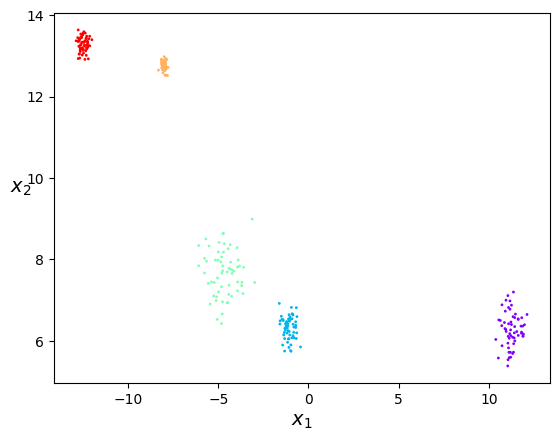

In [6]:
plot_clusters(X, y)

In [ ]:
##### Synthetic data for KMeans

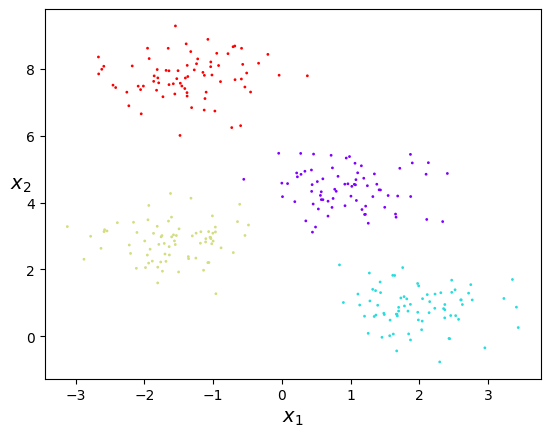

In [7]:
num_clusters = 4
X, y = make_blobs(n_samples=300, centers=num_clusters, cluster_std=0.6, random_state=0)
plot_clusters(X, y)

OUTLIER ANALYSIS

In [17]:
X_clust1 = X[kmeans.labels_ ==1]   #data points belonging to cluster 1
X_clust1[:5]

array([[1.15521298, 5.09961887],
       [1.41372442, 4.38117707],
       [1.24258802, 4.50399192],
       [0.45379179, 3.95647753],
       [1.06923853, 4.53068484]])

In [19]:
mean1 = np.mean(X_clust1, axis=0)
var1 = np.var(X_clust1,axis=0)
mean1, var1

(array([0.94973532, 4.41906906]), array([0.36494083, 0.34558283]))

In [20]:
cov_matrix = np.cov(X_clust1)
cov_matrix

array([[7.77916888, 5.85241886, 6.43215038, ..., 3.75306541, 5.89393202,
        8.07999452],
       [5.85241886, 4.40288764, 4.83903084, ..., 2.82350353, 4.43411879,
        6.07873579],
       [6.43215038, 4.83903084, 5.31837772, ..., 3.1031954 , 4.87335571,
        6.68088591],
       ...,
       [3.75306541, 2.82350353, 3.1031954 , ..., 1.810669  , 2.84353158,
        3.89819895],
       [5.89393202, 4.43411879, 4.87335571, ..., 2.84353158, 4.46557148,
        6.1218543 ],
       [8.07999452, 6.07873579, 6.68088591, ..., 3.89819895, 6.1218543 ,
        8.39245329]])

In [25]:
def mahalanobis(X, mean1, cov_matrix_inverse):
    diff = X - mean1
    mahalanobis_dist = np.sqrt(np.dot(np.dot(diff, cov_matrix_inverse), diff))
    return mahalanobis_dist

In [8]:
kmeans = KMeans(n_clusters=num_clusters, random_state=42, verbose=1)
kmeans.fit(X)

c:\Users\MSIS\anaconda3\envs\quickstart\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 372.75849620328324.
Iteration 1, inertia 212.60046091531896.
Iteration 2, inertia 212.00599621083478.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 409.2805086548156.
Iteration 1, inertia 213.52355249970208.
Iteration 2, inertia 212.0706628599574.
Iteration 3, inertia 212.00599621083478.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 328.62007585428415.
Iteration 1, inertia 212.9512899435114.
Iteration 2, inertia 212.00599621083478.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 286.557274032127.
Iteration 1, inertia 212.96867251062514.
Iteration 2, inertia 212.00599621083478.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 363.2979910898266.
Iteration 1, inertia 212.32534163947722.
Iteration 2, inertia 212.00599621083478.
Converged at iteration 2: strict convergence.


KMeans(n_clusters=4, random_state=42, verbose=1)

In [9]:
y_pred = kmeans.predict(X)

print("X[i] belongs to cluster:\n", y_pred)

X[i] belongs to cluster:
 [0 2 1 2 0 0 3 1 2 2 3 2 1 2 0 1 1 0 3 3 0 0 1 3 3 1 0 1 3 1 2 2 1 2 2 2 2
 2 3 0 1 3 1 1 3 3 2 3 2 0 3 0 2 0 0 3 2 3 2 0 2 1 2 3 3 3 2 0 2 3 1 3 2 3
 3 2 3 1 0 2 0 1 0 0 2 1 0 1 2 2 1 0 2 3 3 1 0 0 1 3 2 0 2 0 1 0 0 1 2 1 3
 3 0 2 0 1 2 0 0 1 3 0 3 0 0 0 0 3 0 3 2 3 3 0 2 3 3 2 1 2 2 3 1 3 1 3 2 1
 2 2 2 1 2 1 0 3 2 3 0 1 2 1 1 0 1 3 3 1 0 1 1 2 0 1 3 2 0 0 1 3 0 1 3 3 1
 1 1 1 0 2 1 3 1 1 3 3 3 1 3 2 1 3 0 3 1 2 3 2 1 2 1 3 1 1 2 3 3 0 0 1 2 0
 0 3 0 3 1 2 2 1 1 2 1 0 3 1 0 3 2 3 0 1 0 2 2 2 2 3 3 2 1 3 0 1 3 3 3 0 0
 2 1 1 3 0 2 3 1 2 1 0 0 3 3 1 0 0 0 1 2 2 0 0 1 0 0 0 2 3 2 1 0 0 2 2 2 0
 0 1 2 3]


In [10]:
print("Instance labels:\n", kmeans.labels_)
print("Cluster Centroids:\n", kmeans.cluster_centers_)
print("Inertia: ", kmeans.inertia_)

Instance labels:
 [0 2 1 2 0 0 3 1 2 2 3 2 1 2 0 1 1 0 3 3 0 0 1 3 3 1 0 1 3 1 2 2 1 2 2 2 2
 2 3 0 1 3 1 1 3 3 2 3 2 0 3 0 2 0 0 3 2 3 2 0 2 1 2 3 3 3 2 0 2 3 1 3 2 3
 3 2 3 1 0 2 0 1 0 0 2 1 0 1 2 2 1 0 2 3 3 1 0 0 1 3 2 0 2 0 1 0 0 1 2 1 3
 3 0 2 0 1 2 0 0 1 3 0 3 0 0 0 0 3 0 3 2 3 3 0 2 3 3 2 1 2 2 3 1 3 1 3 2 1
 2 2 2 1 2 1 0 3 2 3 0 1 2 1 1 0 1 3 3 1 0 1 1 2 0 1 3 2 0 0 1 3 0 1 3 3 1
 1 1 1 0 2 1 3 1 1 3 3 3 1 3 2 1 3 0 3 1 2 3 2 1 2 1 3 1 1 2 3 3 0 0 1 2 0
 0 3 0 3 1 2 2 1 1 2 1 0 3 1 0 3 2 3 0 1 0 2 2 2 2 3 3 2 1 3 0 1 3 3 3 0 0
 2 1 1 3 0 2 3 1 2 1 0 0 3 3 1 0 0 0 1 2 2 0 0 1 0 0 0 2 3 2 1 0 0 2 2 2 0
 0 1 2 3]
Cluster Centroids:
 [[ 1.98258281  0.86771314]
 [ 0.94973532  4.41906906]
 [-1.37324398  7.75368871]
 [-1.58438467  2.83081263]]
Inertia:  212.00599621083478


In [11]:
X_new = np.array([[0, 2], [3, 2], [-3, 1], [-3, 2.5]])
kmeans.predict(X_new)

array([3, 0, 3, 3])

##### Utility functions for plotting

In [12]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

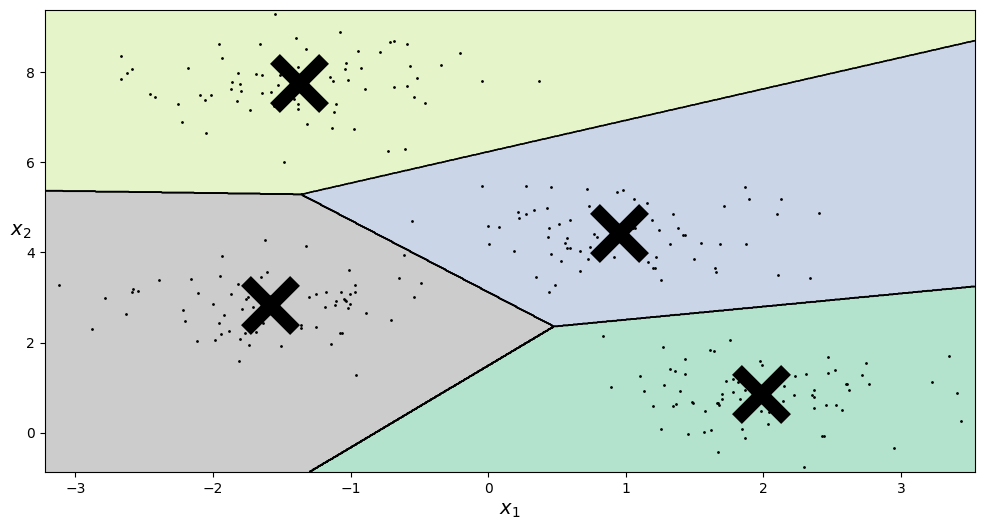

In [13]:
#KMeans producing a linear decision boundary
plt.figure(figsize=(12, 6))
plot_decision_boundaries(kmeans, X)
plt.show()

In [28]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(12, 4))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

c:\Users\MSIS\anaconda3\envs\quickstart\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
c:\Users\MSIS\anaconda3\envs\quickstart\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


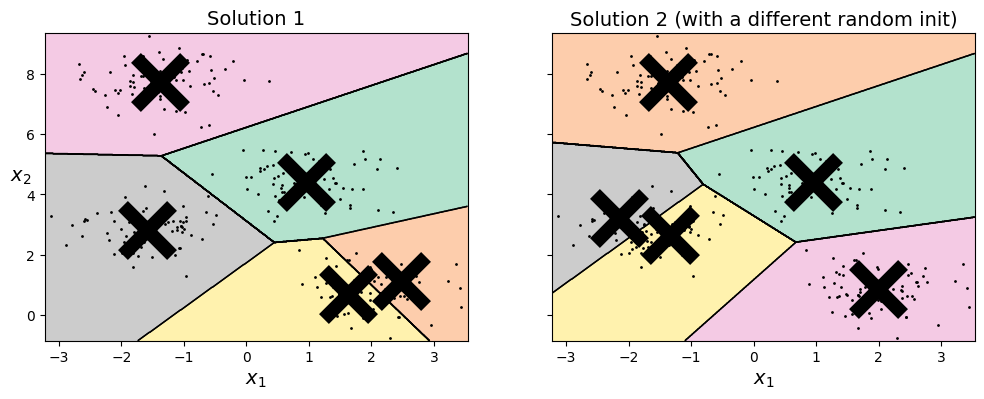

In [29]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=11)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=19)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

plt.show()

c:\Users\MSIS\anaconda3\envs\quickstart\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
c:\Users\MSIS\anaconda3\envs\quickstart\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


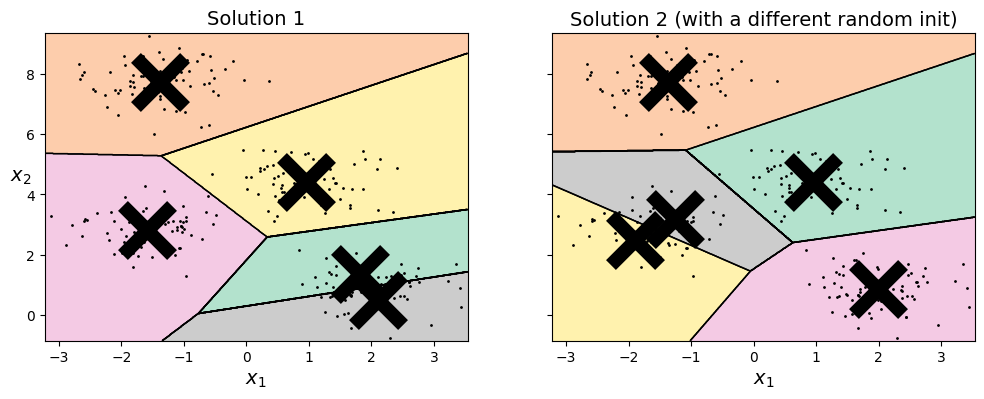

In [30]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="k-means++", n_init=1,
                         algorithm="full", random_state=11)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="k-means++", n_init=1,
                         algorithm="full", random_state=19)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

##### Cross validation to select the right K

In [26]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

c:\Users\MSIS\anaconda3\envs\quickstart\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\MSIS\anaconda3\envs\quickstart\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\MSIS\anaconda3\envs\quickstart\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\MSIS\anaconda3\envs\quickstart\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_

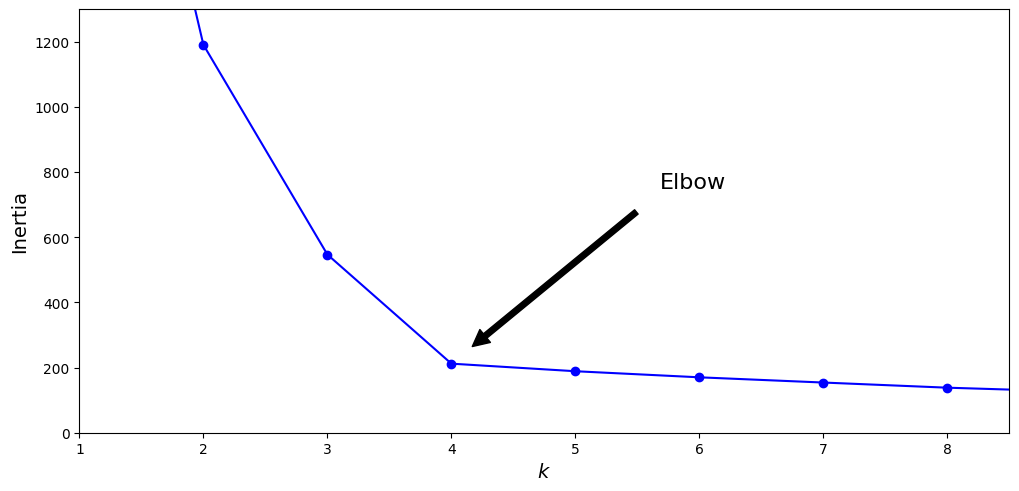

In [27]:
plt.figure(figsize=(12, 5.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

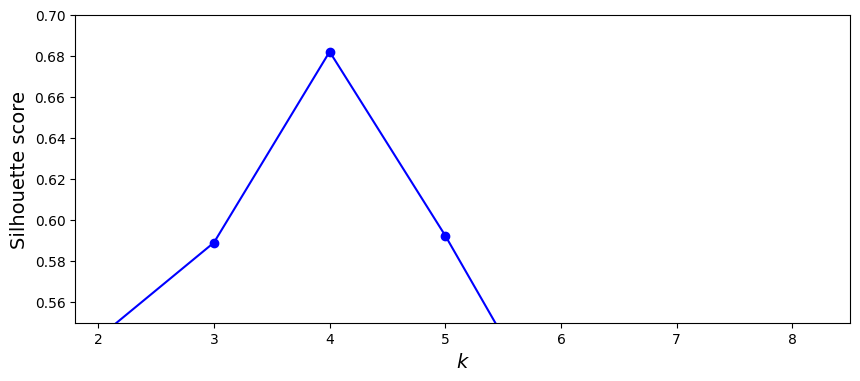

In [31]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(10, 4))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

300
<class 'numpy.ndarray'>
[ 0.2652215   0.79731063  0.37801438  0.80693969  0.5072174   0.67097768
  0.31150048  0.39486107  0.6976155   0.74961936  0.53453385  0.71165
  0.44053099  0.65842791  0.71135159  0.51453855  0.47355083  0.77497343
  0.56430242  0.39630484  0.73371123  0.76849438  0.39630609  0.53080844
  0.50679513  0.40386882  0.78913447  0.4848727   0.41786749  0.5482497
  0.7453784   0.76062204  0.2530074   0.64703655  0.82272362  0.72193476
  0.77651309  0.72216639  0.47758591  0.78827534  0.4179407   0.41582631
  0.13725447  0.3420319   0.48954629  0.51349075  0.82275429  0.53198303
  0.81483395  0.72453836  0.52793652  0.78934507  0.78208925  0.79190564
  0.54613448  0.52911763  0.65700961  0.34292346  0.81126746  0.74046147
  0.72733751  0.53188409  0.71572009  0.54332764  0.54310968  0.52748445
  0.72317813  0.79356584  0.71259898  0.57552657  0.38986587  0.53920483
  0.81030843  0.55710405  0.36937103  0.77125439  0.55289734  0.45946324
  0.80649578  0.80550826  0

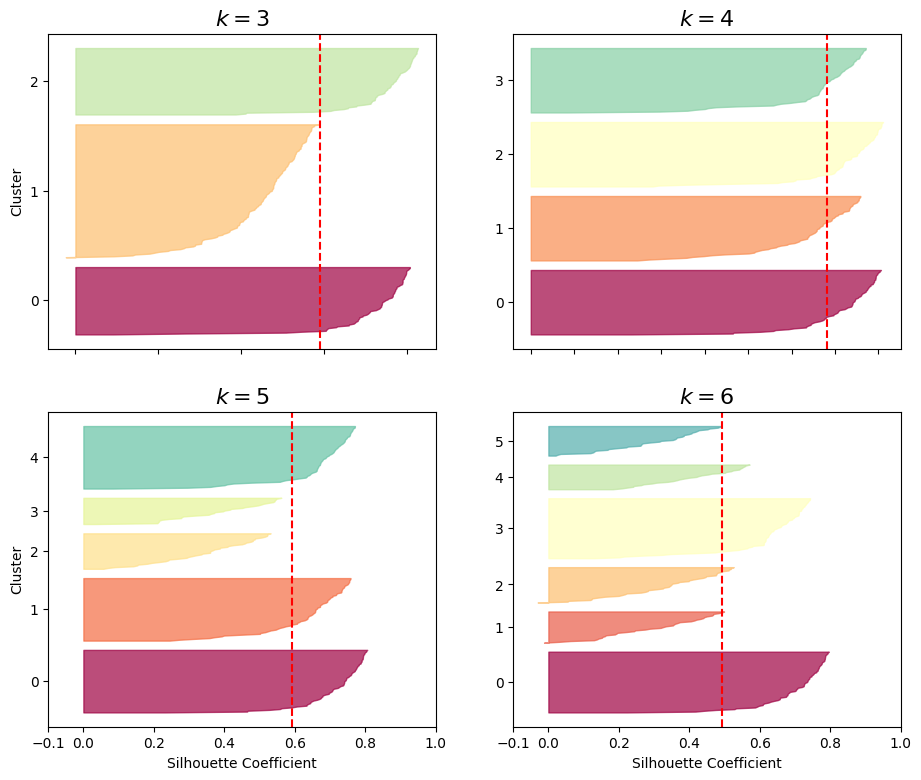

In [32]:
import matplotlib as mpl
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    print(len(silhouette_coefficients))
    print(type(silhouette_coefficients))
    print(silhouette_coefficients)
    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

In [33]:
from yellowbrick.cluster import SilhouetteVisualizer

ModuleNotFoundError: No module named 'yellowbrick'

NameError: name 'SilhouetteVisualizer' is not defined

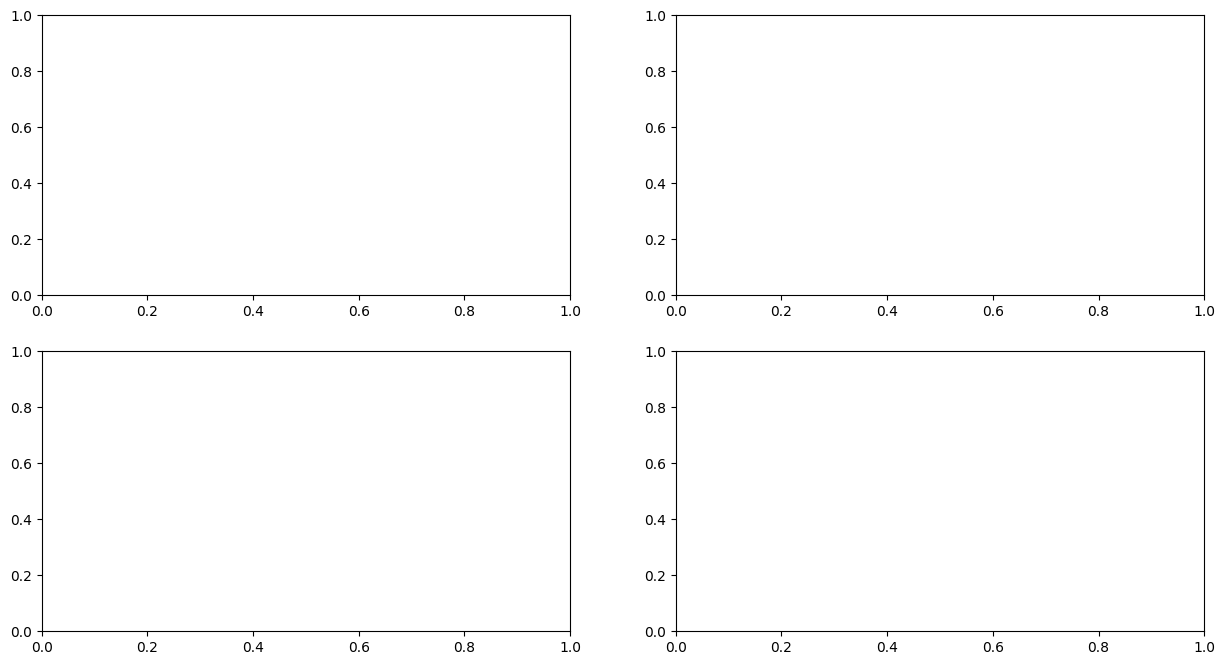

In [34]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X) 

##### Poor man's Image segmentation

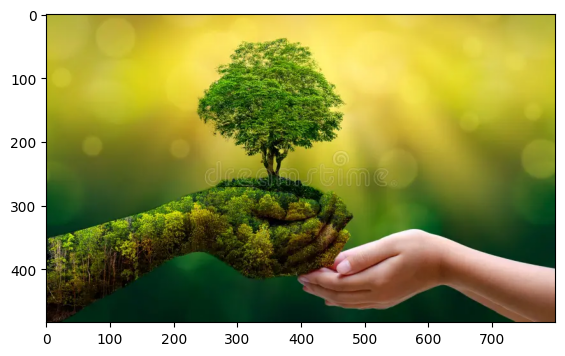

Image Shape (3D Array):  (484, 800, 3)


dtype('uint8')

In [42]:
from matplotlib.image import imread
from pylab import *

plt.figure(figsize=(8, 4))
image = imread("nature.jpg") 
imshow(image)
show()

print("Image Shape (3D Array): ", image.shape)
image.dtype

In [39]:
X = image.reshape(-1, 3)
print("Dimension of Reshaped X: ", X.shape)

Dimension of Reshaped X:  (387200, 3)


In [40]:
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)

c:\Users\MSIS\anaconda3\envs\quickstart\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [41]:
print(f"Label count= {kmeans.labels_.shape}")
print("3D Cluster Center count=", kmeans.cluster_centers_.shape)
print("3D Cluster Centers:\n", kmeans.cluster_centers_)

Label count= (387200,)
3D Cluster Center count= (8, 3)
3D Cluster Centers:
 [[ 11.72100725  39.36411054  16.03584119]
 [200.46069954 188.96530386  52.45953676]
 [ 96.01455734 115.24889555  27.97974038]
 [239.65789378 219.41215654  84.27178438]
 [127.37248588  78.32819776  53.23219063]
 [150.50076153 148.9954308   41.21392354]
 [225.04563427 189.1416804  180.36326194]
 [ 53.66480756  77.11444142  19.87055092]]


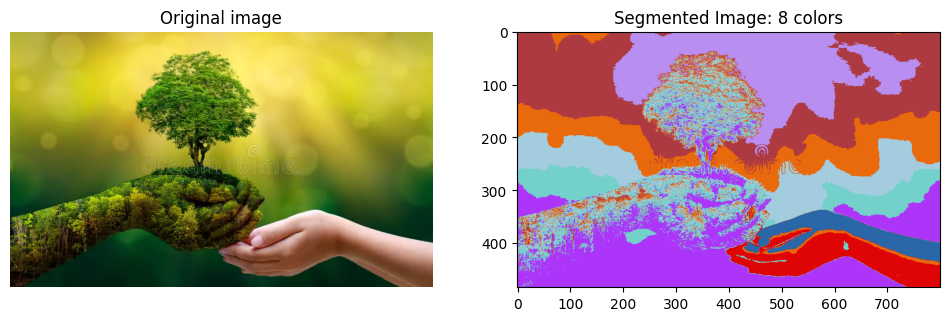

In [43]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

plt.subplot(122)
#plt.imshow(segmented_img/255)
plt.imshow((segmented_img * 255).astype(np.uint8))
plt.title("Segmented Image: {} colors".format(8))
show()

##### MNIST

In [44]:
from sklearn.datasets import load_digits

In [45]:
X_digits, y_digits = load_digits(return_X_y=True)

print(X_digits.shape)

(1797, 64)


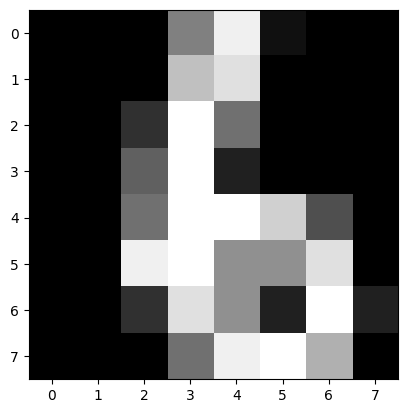

In [46]:
some_digit = X_digits[16]
some_digit_image = some_digit.reshape(8, 8)
plt.imshow(some_digit_image, cmap = 'gray', interpolation="nearest")
plt.show()

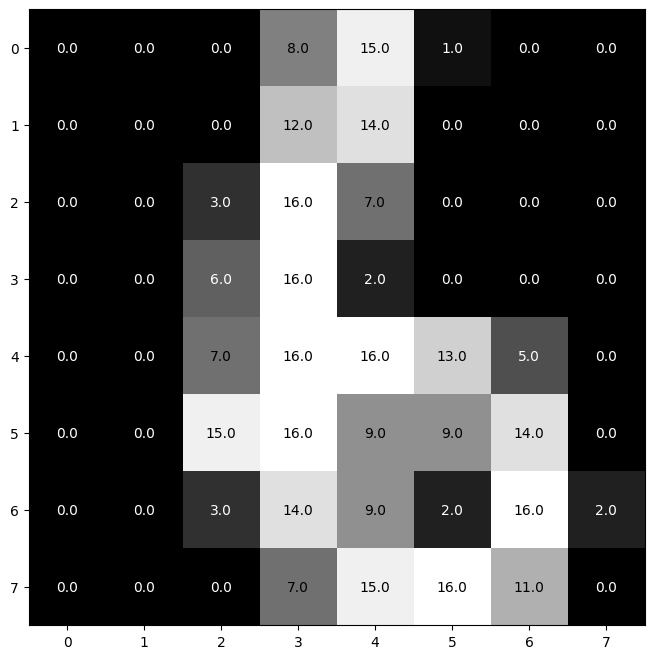

In [47]:
def visualize_digit(img):
    fig = plt.figure(figsize = (8,8)) 
    img = img.reshape(8, 8)
    plt.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            plt.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

visualize_digit(X_digits[16])

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)
print(f"X_train dim {X_train.shape}")

X_train dim (1347, 64)


In [49]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
lr.fit(X_train, y_train)

accuracy_before_preproc = lr.score(X_test, y_test)
print(f"Accuracy before preproc = {accuracy_before_preproc}")

Accuracy before preproc = 0.9688888888888889


##### KMeans for preprocessing

In [52]:
# Step 1: Choose a number of clusters to be the projected dimension of our features and train the K-Means model.
kmeans = KMeans(n_clusters=50, random_state=42)
kmeans.fit(X_train)


# Step 2: Compute the distance of the data points from each cluster center. 
#         These distances will be the new feature vector.
X_train_new = kmeans.transform(X_train)
X_test_new = kmeans.transform(X_test)

print("Dimension of new features: ", X_train_new.shape)

# Classify the data using the new features
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_new, y_train)


accuracy_after_preproc = log_reg.score(X_test_new, y_test)
print("Accuracy after preproc = ", accuracy_after_preproc)

c:\Users\MSIS\anaconda3\envs\quickstart\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Dimension of new features:  (1347, 50)
Accuracy after preproc =  0.9733333333333334


In [53]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("lr", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)

accuracy_after_preproc = pipeline.score(X_test, y_test)

print(f"Accuracy after preproc = {accuracy_after_preproc}")

reduction_in_error = 1 - (1 - accuracy_after_preproc) / (1 - accuracy_before_preproc)
print("Reduction in Error Rate: %f" %  reduction_in_error)

c:\Users\MSIS\anaconda3\envs\quickstart\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Accuracy after preproc = 0.9733333333333334
Reduction in Error Rate: 0.142857


In [56]:
X_train

array([[ 0.,  0.,  2., ...,  0.,  0.,  0.],
       [ 0.,  5., 16., ...,  6.,  1.,  0.],
       [ 0.,  0.,  4., ...,  2.,  0.,  0.],
       ...,
       [ 0.,  0.,  9., ..., 16.,  2.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  1.,  0.,  0.]])

In [54]:
from sklearn.model_selection import GridSearchCV
param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=1, n_jobs=-1)
grid_clf.fit(X_train, y_train)

params_optimal_grid_clf = grid_clf.best_params_

print("Optimal Hyperparameter Values: ", params_optimal_grid_clf)
print("Grid Accuracy: ", grid_clf.score(X_test, y_test))

Fitting 3 folds for each of 98 candidates, totalling 294 fits


c:\Users\MSIS\anaconda3\envs\quickstart\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Optimal Hyperparameter Values:  {'kmeans__n_clusters': 79}
Grid Accuracy:  0.9822222222222222


In [55]:
print("Optimal Number of Clusters: ", params_optimal_grid_clf['kmeans__n_clusters'])

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=params_optimal_grid_clf['kmeans__n_clusters'], random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)

accuracy_after_preproc = pipeline.score(X_test, y_test)

print("Accuracy after preproc: ", accuracy_after_preproc)

reduction_in_error = 1 - (1 - accuracy_after_preproc) / (1 - accuracy_before_preproc)
print("Reduction in Error Rate: %f" %  reduction_in_error)

Optimal Number of Clusters:  79


c:\Users\MSIS\anaconda3\envs\quickstart\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Accuracy after preproc:  0.9822222222222222
Reduction in Error Rate: 0.428571


##### Gaussian Mixture Models

In [57]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

C:\Users\MSIS\AppData\Local\Temp\ipykernel_2548\3765311429.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=y, s=5, cmap='autumn')


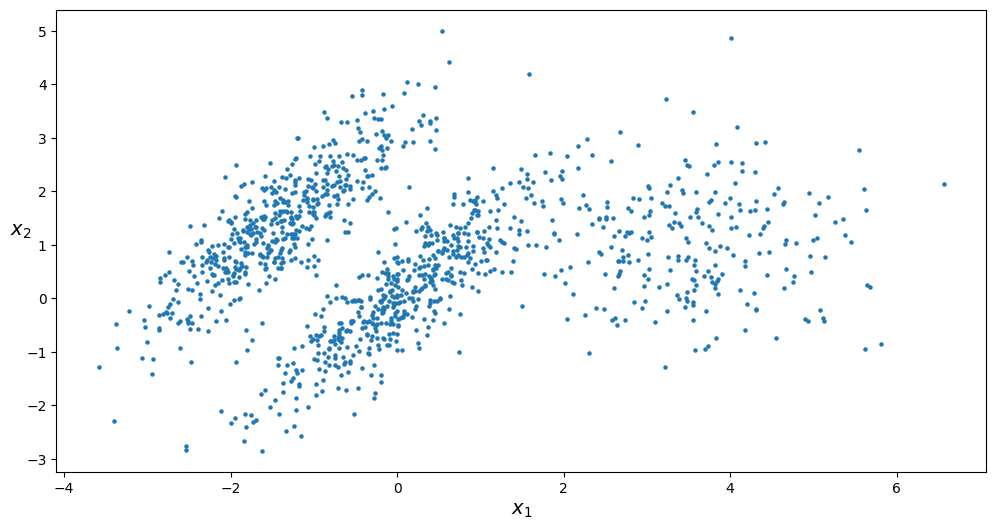

In [58]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=5, cmap='autumn')
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    
plt.figure(figsize=(12, 6))
plot_clusters(X)
plt.show()

In [59]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gmm.fit(X)


GaussianMixture(n_components=3, n_init=10, random_state=42)

In [63]:
from matplotlib.colors import LogNorm
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)


def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [64]:
# Compute the log-likelihood of each sample
densities = gmm.score_samples(X)

# Define the threshold is at the fourth percentile lowest density
density_threshold = np.percentile(densities, 4) 

# Get the anomalous samples
anomalies = X[densities < density_threshold]

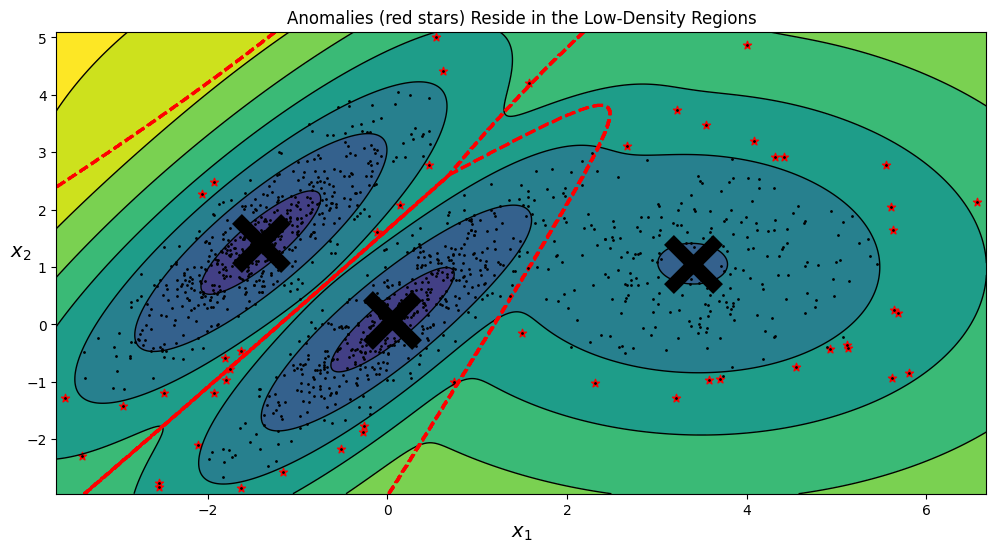

In [62]:

plt.figure(figsize=(12, 6))
plt.title("Anomalies (red stars) Reside in the Low-Density Regions")

plot_gaussian_mixture(gmm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

plt.show()

##### Decision boundary for mixture models

C:\Users\MSIS\AppData\Local\Temp\ipykernel_2548\3823662884.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=None, s=2, cmap='autumn')


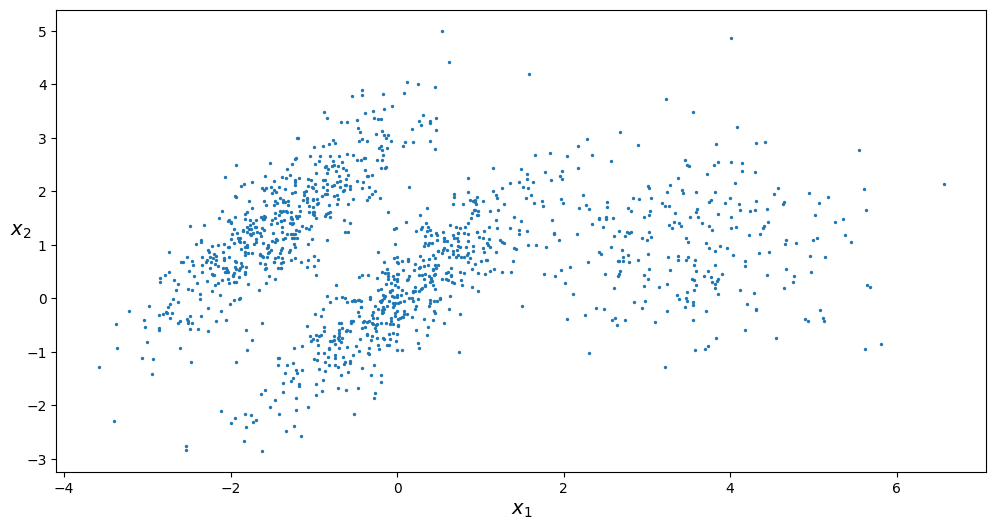

In [65]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]


plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=None, s=2, cmap='autumn')
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.show()

c:\Users\MSIS\anaconda3\envs\quickstart\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\MSIS\anaconda3\envs\quickstart\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\MSIS\anaconda3\envs\quickstart\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\MSIS\anaconda3\envs\quickstart\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_

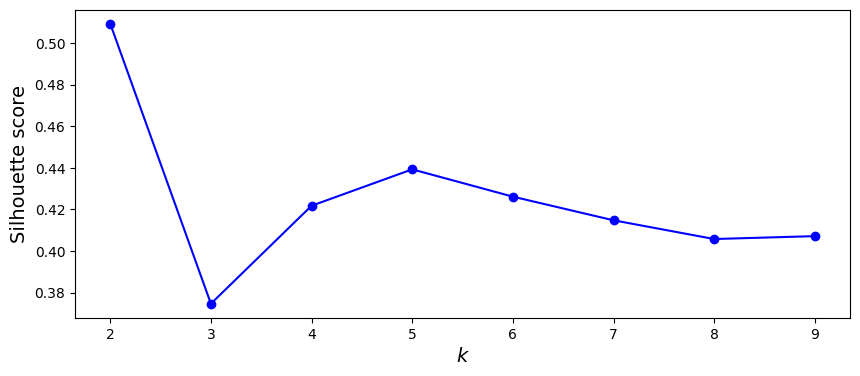

In [66]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]



silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(10, 4))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

In [67]:
# Number of clusters
k = 3

# Train the K-Means model
kmeans = KMeans(n_clusters=k, random_state=42, verbose=1)
kmeans.fit(X)

Initialization complete
Iteration 0, inertia 3225.7806273693295.
Iteration 1, inertia 2268.408032763855.
Iteration 2, inertia 2243.22457572225.
Iteration 3, inertia 2242.5708900402296.
Converged at iteration 3: center shift 0.00011244051617867015 within tolerance 0.0002732132474543051.
Initialization complete
Iteration 0, inertia 3209.0799025215783.
Iteration 1, inertia 2255.6749038134813.
Iteration 2, inertia 2245.3702076463005.
Iteration 3, inertia 2243.258517821495.
Iteration 4, inertia 2242.61791300434.
Converged at iteration 4: center shift 0.000156454582085561 within tolerance 0.0002732132474543051.
Initialization complete
Iteration 0, inertia 2761.409625375492.
Iteration 1, inertia 2370.7957799508176.
Iteration 2, inertia 2268.9163455783155.
Iteration 3, inertia 2249.8015979338143.
Iteration 4, inertia 2244.8631097533535.
Iteration 5, inertia 2242.7603466187297.
Converged at iteration 5: center shift 0.0002576400087853394 within tolerance 0.0002732132474543051.
Initialization co

c:\Users\MSIS\anaconda3\envs\quickstart\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42, verbose=1)

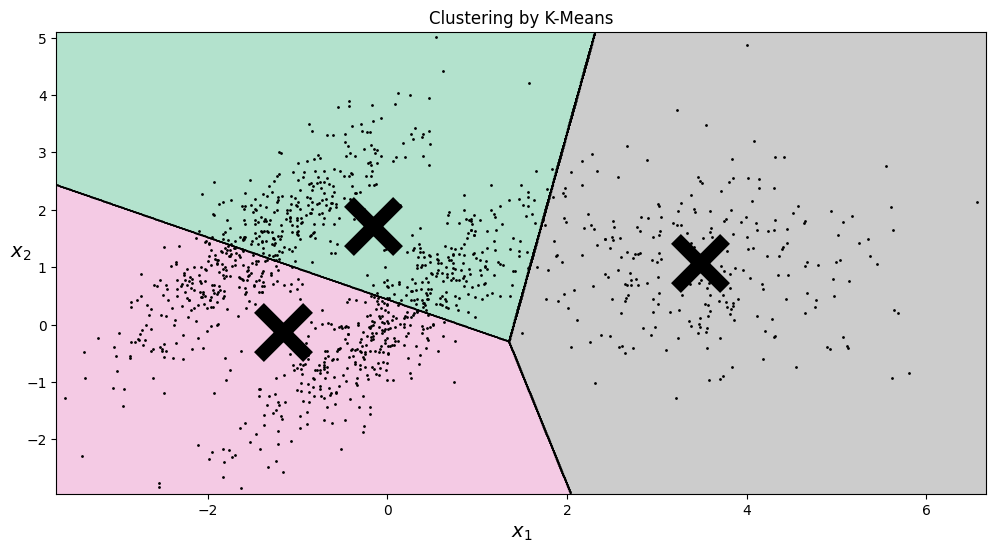

In [68]:
plt.figure(figsize=(12, 6))
plt.title("Clustering by K-Means")
plot_decision_boundaries(kmeans, X)
plt.show()

In [69]:
gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

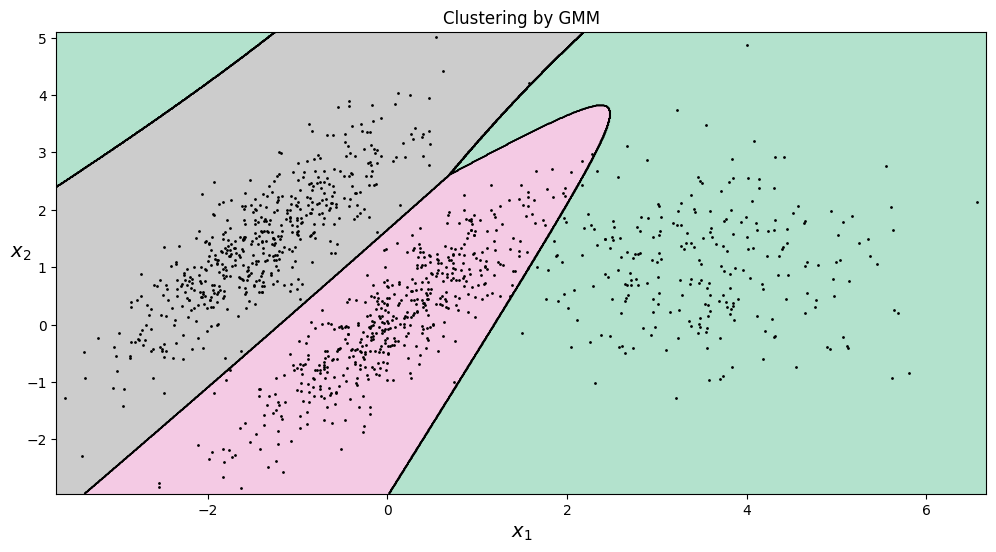

In [70]:
plt.figure(figsize=(12, 6))
plt.title("Clustering by GMM")
plot_decision_boundaries(gm, X, show_centroids=False)
plt.show()

##### DBSCAN for non globular data

C:\Users\MSIS\AppData\Local\Temp\ipykernel_2548\780380561.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=None, s=5, cmap='autumn')


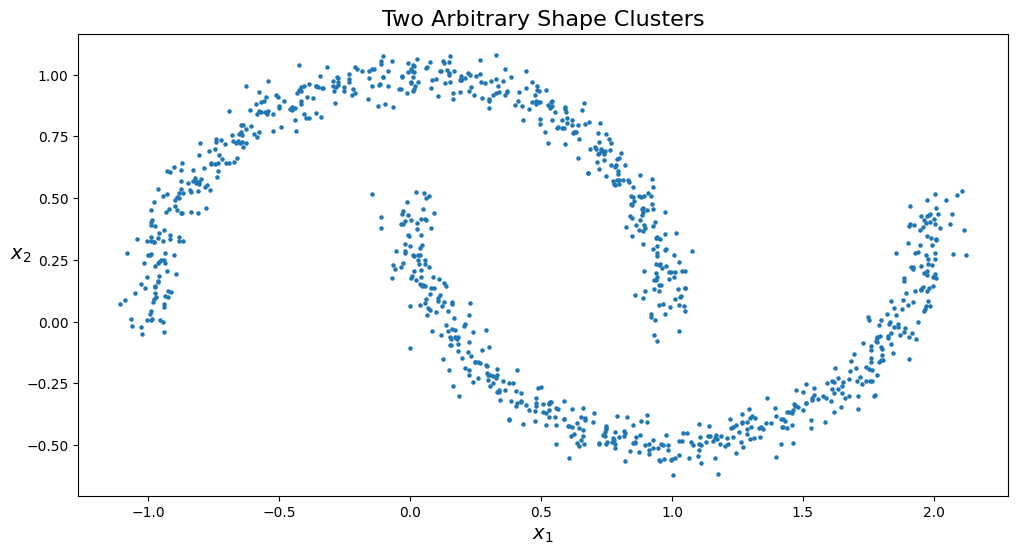

In [71]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)


plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=None, s=5, cmap='autumn')
plt.title("Two Arbitrary Shape Clusters", fontsize=16)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.show()

In [72]:
# Number of clusters
k = 2

# Train the K-Means model
kmeans = KMeans(n_clusters=k, random_state=42, verbose=1)
kmeans.fit(X)

Initialization complete
Iteration 0, inertia 619.3335316073199.
Iteration 1, inertia 453.91205173757226.
Iteration 2, inertia 419.47875248888096.
Iteration 3, inertia 408.46583239850884.
Iteration 4, inertia 404.8714787620755.
Iteration 5, inertia 403.93691353424873.
Iteration 6, inertia 403.7193772760851.
Converged at iteration 6: center shift 2.8537666641004648e-05 within tolerance 4.995223022533364e-05.
Initialization complete
Iteration 0, inertia 652.694065837828.
Iteration 1, inertia 469.6096006733358.
Iteration 2, inertia 424.82059674900876.
Iteration 3, inertia 408.65609343478803.
Iteration 4, inertia 405.2298963160256.
Iteration 5, inertia 404.52201642495436.
Iteration 6, inertia 404.2149303070099.
Iteration 7, inertia 403.969154157396.
Iteration 8, inertia 403.76172006884207.
Iteration 9, inertia 403.6934822864333.
Converged at iteration 9: center shift 2.7564581580797324e-05 within tolerance 4.995223022533364e-05.
Initialization complete
Iteration 0, inertia 787.2586029091349

c:\Users\MSIS\anaconda3\envs\quickstart\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=42, verbose=1)

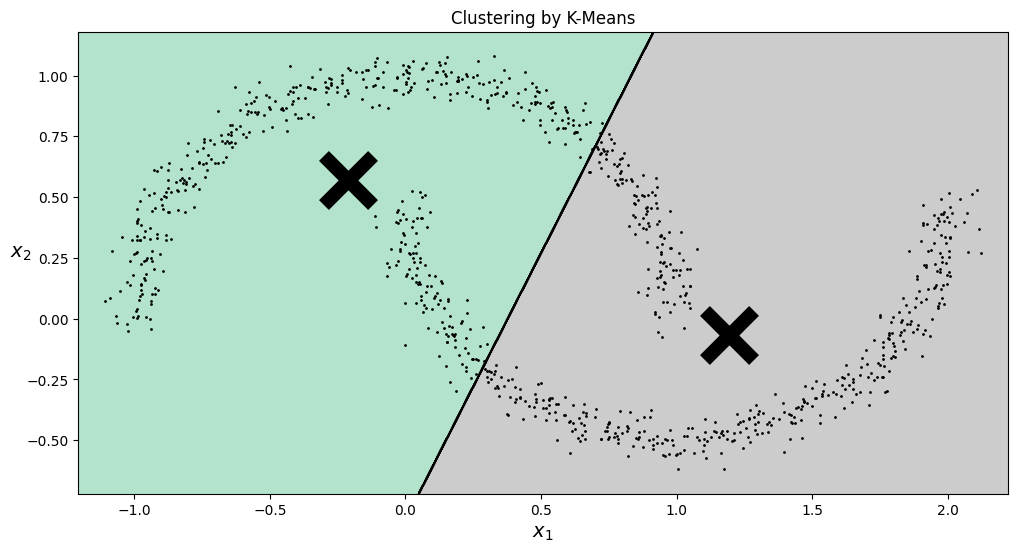

In [73]:
plt.figure(figsize=(12, 6))
plt.title("Clustering by K-Means")
plot_decision_boundaries(kmeans, X)
plt.show()

In [74]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.15, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.15)

In [75]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("Clustering by DBSCAN\neps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

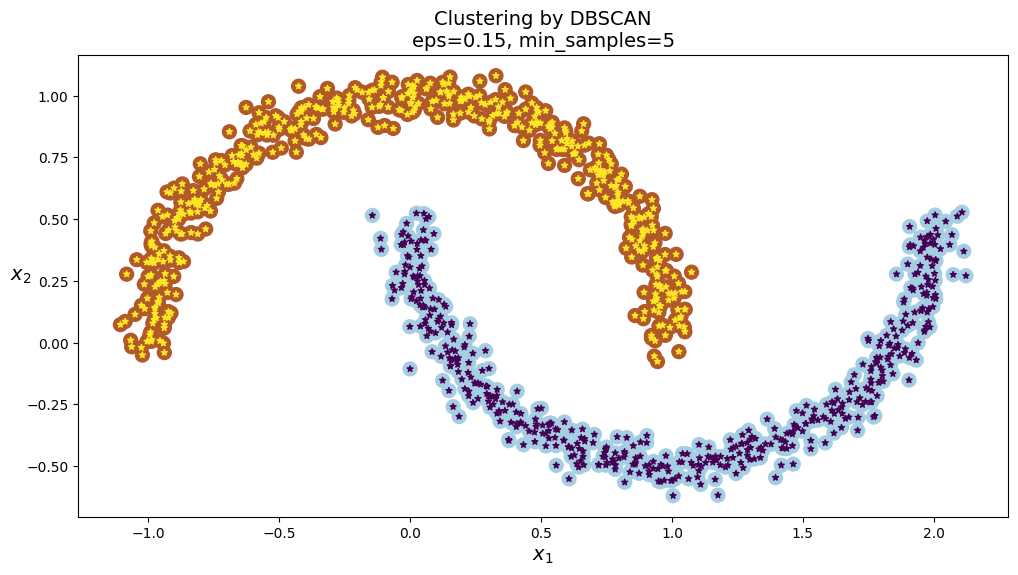

In [76]:
plt.figure(figsize=(12, 6))
plot_dbscan(dbscan, X, size=100)
plt.show()